- 図1　レーザー散乱装置の概要図
- 図2　後方散乱画像の解析フロー
- 図3　粉質化の経時変化
- 図4　各貯蔵期間の空隙分布の比較・および各貯蔵期間の元画像（代表的）
- 図5　粉質化大・中・小での変数の比較
- 図6　yy-plot (ANN)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm

## 粉質化の程度による後方散乱画像の比較

True

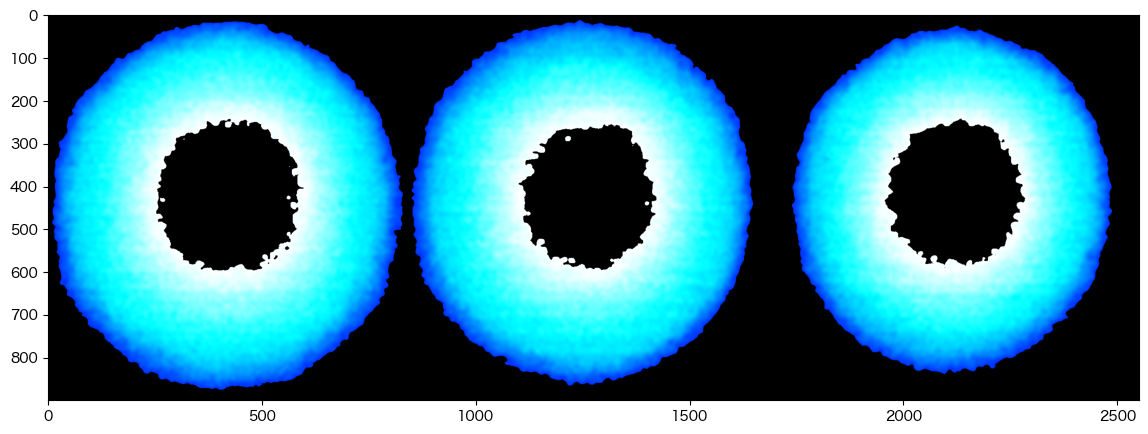

In [15]:
# 画像の読み込み


# high
# 04_06_4   Second
# 03_08_4	First
# 04_06_2   Second
# 04_10_2   First
# 03_10_4   First
high_im1 = cv2.imread('./../data/data_SecondStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week04//04_06_4.png',0)
high_im2 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week03/03_08_4.png',0)
high_im3 = cv2.imread('./../data/data_SecondStorage/data_laser/HDRimage/Original_func/SecondStorage/633nm/week04/04_06_2.png',0)
high_im4 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week04/04_10_2.png',0)
high_im5 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week03/03_10_4.png',0)

# middle
# 03_07_4   First
# 04_04_2   First
# 02_03_2   Second
# 02_06_2   Second
# 03_02_4	Second
mid_im1 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week03//03_07_4.png',0)
mid_im2 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week04/04_04_2.png',0)
mid_im3 = cv2.imread('./../data/data_SecondStorage/data_laser/HDRimage/Original_func/SecondStorage/633nm/week02/02_03_2.png',0)
mid_im4 = cv2.imread('./../data/data_SecondStorage/data_laser/HDRimage/Original_func/SecondStorage/633nm/week02/02_06_2.png',0)
mid_im5 = cv2.imread('./../data/data_SecondStorage/data_laser/HDRimage/Original_func/Secondstorage/633nm/week03/03_02_4.png',0)

# low
# 00_02_4   First
# 00_06_2   Second
# 00_01_2   First
# 00_06_4   First
# 00_04_2   First
low_im1 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week00//00_02_4.png',0)
low_im2 = cv2.imread('./../data/data_SecondStorage/data_laser/HDRimage/Original_func/SecondStorage/633nm/week00/00_06_2.png',0)
low_im3 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week00/00_01_2.png',0)
low_im4 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/FirstStorage/633nm/week00/00_06_4.png',0)
low_im5 = cv2.imread('./../data/data_FirstStorage/data_laser/HDRimage/Original_func/Firststorage/633nm/week00/00_04_2.png',0)


# 画像の表示
########################
high_im = np.mean([high_im1,high_im2,high_im3,high_im4,high_im5],axis=0).astype('uint8')
high_im = cv2.GaussianBlur(high_im,(15,15),5)
thresh_1, img_binary = cv2.threshold(high_im, 0, high_im.max(), cv2.THRESH_OTSU)
mask = np.where(high_im<thresh_1, 0, high_im)
mask_high_img = np.where(mask>=255,0, mask)[250:1150,150:1000]

mid_im = np.mean([mid_im1,mid_im2,mid_im3,low_im4,mid_im5],axis=0).astype('uint8')
mid_im = cv2.GaussianBlur(mid_im,(15,15),5)
thresh_2, img_binary = cv2.threshold(mid_im, 0, mid_im.max(), cv2.THRESH_OTSU)
mask = np.where(mid_im<thresh_1, 0, mid_im)
mask_mid_img = np.where(mask>=255,0, mask)[250:1150,150:1000]

low_im = np.mean([low_im1,low_im2,low_im3,mid_im4,low_im5],axis=0).astype('uint8')
low_im = cv2.GaussianBlur(low_im,(15,15),5)
thresh_3, img_binary = cv2.threshold(low_im, 0, low_im.max(), cv2.THRESH_OTSU)
mask = np.where(low_im<thresh_1, 0, low_im)
mask_low_img = np.where(mask>=255,0, mask)[250:1150,150:1000]


######################
temp = mask_high_img.flatten()
pixel2cm(len(temp[temp>0]))

fig = plt.figure(figsize=(15,5))
all_im = cv2.hconcat([mask_low_img,mask_mid_img,mask_high_img])
all_im = cv2.applyColorMap(all_im, cv2.COLORMAP_HOT)
# all_im = cv2.cvtColor(all_im,cv2.COLOR_BGR2RGB)
plt.imshow(all_im)

cv2.imwrite('./../output/図_粉質化の程度による後方散乱画像の比較.png',all_im)

## 粉質化の程度によるプロファイルの比較

In [19]:
# プロファイルを算出

profile_smooth_1 = pd.read_csv('./../data/data_FirstStorage/data_laser/smoothing/smoothing_2/633nm/Smooth_all.csv',index_col=0)
profile_smooth_2 = pd.read_csv('./../data/data_SecondStorage/data_laser/smoothing/smoothing_2/633nm/Smooth_all.csv',index_col=0)


high_1 = profile_smooth_2.loc[:,['04_06_4']]
high_2 = profile_smooth_1.loc[:,['03_08_4']]
high_3 = profile_smooth_2.loc[:,['04_06_2']]
high_4 = profile_smooth_1.loc[:,['04_10_2']]
high_5 = profile_smooth_1.loc[:,['03_10_4']]

middle_1 = profile_smooth_1.loc[:,['03_07_4']]
middle_2 = profile_smooth_1.loc[:,['04_04_2']]
middle_3 = profile_smooth_2.loc[:,['02_03_2']]
middle_4 = profile_smooth_2.loc[:,['02_06_2']]
middle_5 = profile_smooth_2.loc[:,['03_02_4']]

low_1 = profile_smooth_1.loc[:,['00_02_4']]
low_2 = profile_smooth_2.loc[:,['00_06_2']]
low_3 = profile_smooth_1.loc[:,['00_01_2']]
low_4 = profile_smooth_1.loc[:,['00_06_4']]
low_5 = profile_smooth_1.loc[:,['00_04_2']]

high_mean = np.mean([high_1,high_2,high_3,high_4,high_5],axis=0)
middle_mean = np.mean([middle_1,middle_2,middle_3,middle_4,middle_5],axis=0)
low_mean = np.mean([low_1,low_2,low_3,low_4,low_5],axis=0)


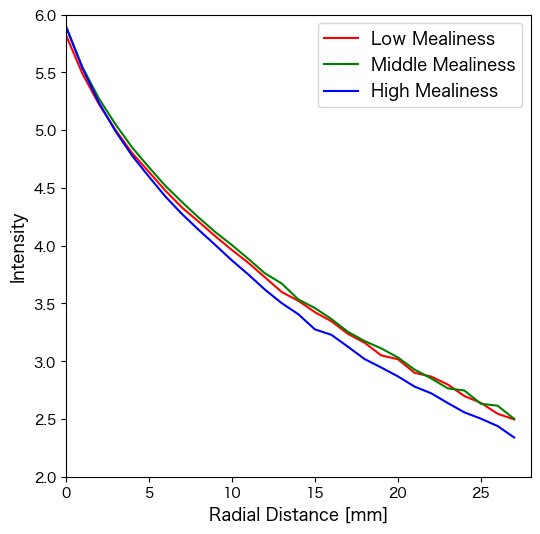

In [21]:
fig = plt.figure(figsize=(6,6))
plt.plot(low_mean,c='r',label='Low Mealiness')
plt.plot(middle_mean,c='g',label='Middle Mealiness')
plt.plot(high_mean,c='b',label='High Mealiness')
plt.xlim(0,28)
plt.ylim(2,6)
plt.legend(fontsize=12)
plt.xlabel('Radial Distance [mm]',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
fig.savefig('./../output/図_粉質化の程度によるプロファイルの比較.png',dpi=400)

## 図5　粉質化大・中・小での変数の比較

In [22]:
# 1. データの読み込み
###### 633 nm ######
wavelen = 633
feature_First_df = pd.read_csv(f'./../data/data_FirstStorage/data_laser/feature/feature_2/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)
feature_Second_df = pd.read_csv(f'./../data/data_SecondStorage/data_laser/feature/feature_2/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)

target_First_df = pd.read_csv(f'./../data/data_FirstStorage/data_mealiness_shake/Mealiness.csv',index_col=0)
target_First_df = target_First_df.iloc[:feature_First_df.shape[0],0].astype(float) #初期状態が文字列だったので，小数に変換
target_Second_df = pd.read_csv(f'./../data/data_SecondStorage/data_mealiness_shake/Mealiness.csv',index_col=0)
target_Second_df = target_Second_df.iloc[:feature_Second_df.shape[0],0].astype(float) #初期状態が文字列だったので，小数に変換

feature_df_633 = pd.concat([feature_First_df, feature_Second_df],axis=0).iloc[:,:]
feature_df_633.columns = [f'{col}_633' for col in feature_df_633.columns]



###### 850 nm ######
wavelen = 850
feature_First_df = pd.read_csv(f'./../data/data_FirstStorage/data_laser/feature/feature_2/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)
feature_Second_df = pd.read_csv(f'./../data/data_SecondStorage/data_laser/feature/feature_2/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)
feature_df_850 = pd.concat([feature_First_df, feature_Second_df],axis=0).iloc[:,:]
feature_df_850.columns = [f'{col}_850' for col in feature_df_850.columns]

# 目的変数
target_df = pd.concat([target_First_df, target_Second_df],axis=0)
target_df.index = feature_df_633.index

# 合成
feature_df = pd.concat([feature_df_633, feature_df_850],axis=1)

# 実験に失敗したサンプル2(Firststorage, 04_03_2)を削除
# 実験に失敗したサンプル2(Secondstorage, 04_08_4)を削除
target_df = target_df.dropna(axis=0)
feature_df = feature_df.reset_index()
target_df = target_df.reset_index()

target_df = target_df.drop(target_df.index[84],axis=0)
feature_df = feature_df.drop([feature_df.index[84],feature_df.index[195]],axis=0)

feature_df = feature_df.drop(['index'],axis=1)
target_df.index = target_df['index']
target_df = target_df.drop(['index'],axis=1)
feature_df.index = target_df.index


In [23]:
fea_tar = pd.concat([feature_df,target_df],axis=1)

NUM = 5
high_df = fea_tar.sort_values(by='Mealiness (%)',ascending=False).head(5)
low_df = fea_tar.sort_values(by='Mealiness (%)',ascending=True).head(5)

THRESH = 0.5
middle_df = fea_tar[(fea_tar['Mealiness (%)']<=fea_tar['Mealiness (%)'].mean()+THRESH)&(fea_tar['Mealiness (%)']>=fea_tar['Mealiness (%)'].mean()-THRESH)]
print(middle_df.shape[0],'個')

hml = pd.concat([high_df,middle_df,low_df],axis=0)

5 個


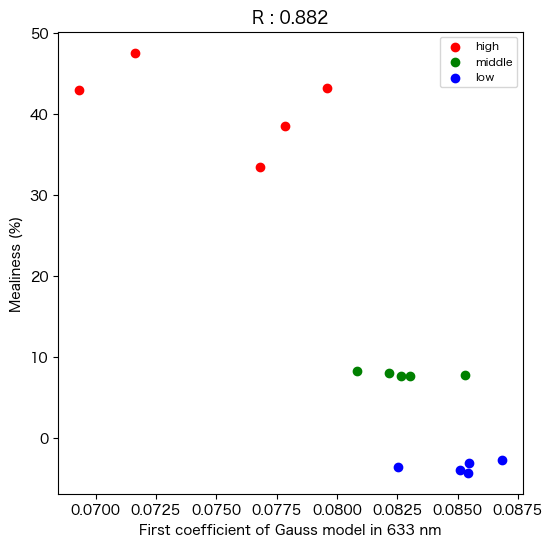

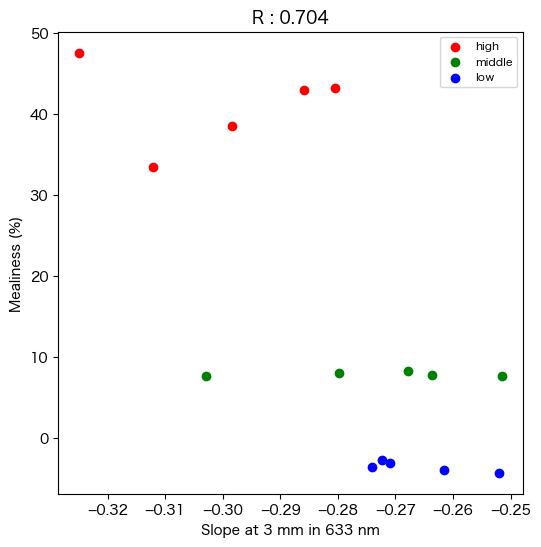

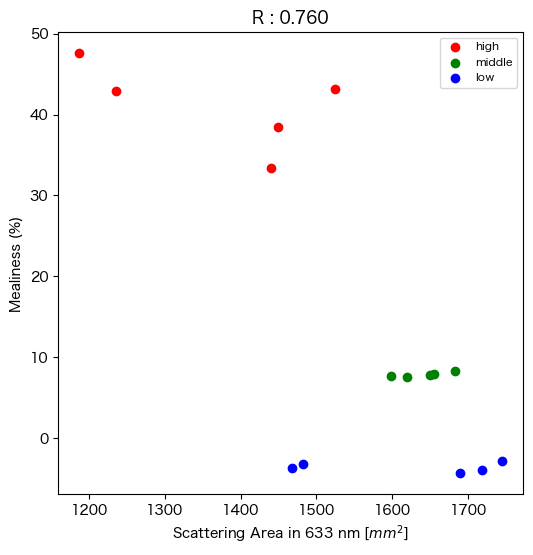

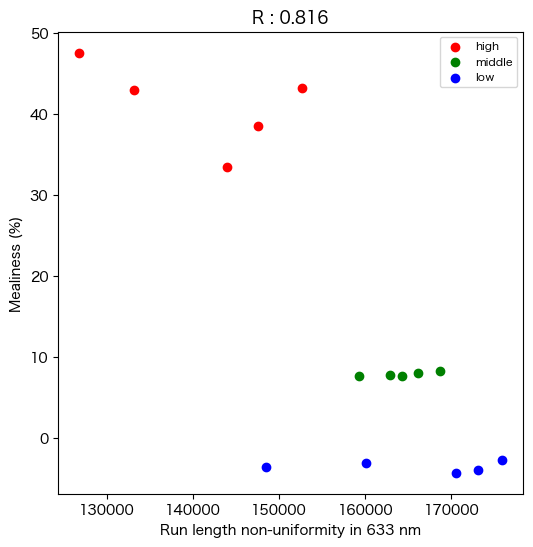

In [27]:
# 個々をプロット

corr_matrix = abs(hml.corr()['Mealiness (%)']).sort_values(ascending=False).head(35)
LABEL = corr_matrix.index

def pixel2cm(data):
    '''
    返り値は、cm2である
    100mmで、1637pixel;
    1 pixelあたり、0.0611mm
    1 pixel当たりの面積、0.0037317 mm2
    '''
    return data*(100/1637)**2

for i_LABEL in ['Ga_1_633','diff_3_633','FOS_Area_633','GLRLM_RunLengthNonUniformity_633']:
    
    NUM = 5 # 各クラスのサンプルの数
    fig = plt.figure(figsize=(6,6))

    plt.ylabel('Mealiness (%)')
    if i_LABEL == 'Ga_1_633':
        plt.xlabel(f'First coefficient of Gauss model in 633 nm')
        plt.scatter(high_df[i_LABEL],high_df['Mealiness (%)'],c='r',label=f'high',marker='o')
        plt.scatter(middle_df[i_LABEL],middle_df['Mealiness (%)'],c='g',label=f'middle',marker='o')
        plt.scatter(low_df[i_LABEL],low_df['Mealiness (%)'],c='b',label=f'low',marker='o')
    elif i_LABEL == 'diff_3_633':
        plt.xlabel(f'Slope at 3 mm in 633 nm')
        plt.scatter(high_df[i_LABEL],high_df['Mealiness (%)'],c='r',label=f'high',marker='o')
        plt.scatter(middle_df[i_LABEL],middle_df['Mealiness (%)'],c='g',label=f'middle',marker='o')
        plt.scatter(low_df[i_LABEL],low_df['Mealiness (%)'],c='b',label=f'low',marker='o')
    elif i_LABEL == 'FOS_Area_633':
        plt.xlabel(f'Scattering Area in 633 nm [$mm^{2}$]')
        plt.scatter(pixel2cm(high_df[i_LABEL]),high_df['Mealiness (%)'],c='r',label=f'high',marker='o')
        plt.scatter(pixel2cm(middle_df[i_LABEL]),middle_df['Mealiness (%)'],c='g',label=f'middle',marker='o')
        plt.scatter(pixel2cm(low_df[i_LABEL]),low_df['Mealiness (%)'],c='b',label=f'low',marker='o')
    else:
        plt.xlabel(f'Run length non-uniformity in 633 nm')
        plt.scatter(high_df[i_LABEL],high_df['Mealiness (%)'],c='r',label=f'high',marker='o')
        plt.scatter(middle_df[i_LABEL],middle_df['Mealiness (%)'],c='g',label=f'middle',marker='o')
        plt.scatter(low_df[i_LABEL],low_df['Mealiness (%)'],c='b',label=f'low',marker='o')
        
    
    plt.title(f'R : {corr_matrix[i_LABEL]:.3f}')
    plt.legend(fontsize=8)

    fig.savefig(f'./../output/図_散布図_特徴量_粉質化_{i_LABEL}.png',dpi=400)
    plt.show()

## fitting精度一覧

In [ ]:
def Farrell(x,a,b):
    '''
    Farrell式
    プロファイルを指数乗する
     -> np.exp(profile)
    '''
    return (a/(x**2))*np.exp(-b*x)

def Ex(x,a,b,c):
    '''
    指数関数 (exponential)
    '''
    return a + b*np.exp(-x/c)

def Ga(x,a,b,c):
    '''
    ガウス関数 (Gaussian)
    '''
    return a + b*np.exp(-0.5*(x/c)**2)

def Lo(x,a,b,c):
    '''
    ローレンツ関数 (Lorentzian)
    '''
    return a + b/(1+(x/c)**2)

def ML2(x,a,b):
    '''
    修正ローレンツ関数2 (Modified-Lorentzian 2)
    '''
    return 1/(1+(x/a)**b)

def ML3(x,a,b,c):
    '''
    修正ローレンツ関数3 (Modified-Lorentzian 3)
    '''
    return a + (1-a)/(1+(x/b)**c)

def ML4(x,a,b,c,d):
    '''
    修正ローレンツ関数4 (Modified-Lorentzian 3)
    '''
    return a + b/(c+x**d)

def MG2(x,a,b):
    '''
    修正ゴンペルツ関数2 (Modified-Gompertz 2)
    '''
    return 1 - np.exp(-np.exp(a - b*x))

def MG3(x,a,b,c):
    '''
    修正ゴンペルツ関数3 (Modified-Gompertz 3)
    '''
    return 1 - (1-a)*np.exp(-np.exp(b - c*x))

def MG4(x,a,b,c,d):
    '''
    修正ゴンペルツ関数4 (Modified-Gompertz 4)
    '''
    return a - (b*np.exp(-np.exp(c - d*x)))

def GaussL(x,a,b,c,d,e):
    '''
    Gaussian-Lorentizian関数
    '''
    return a + b/(1+e*((x-c)/d)**2)*np.exp((((1-e)/2)*((x-e)/d))**2)

In [21]:
# 散乱データのlogをとる,正規化する
from sklearn.metrics import r2_score

profile_all = pd.read_csv('./../../data_FirstStorage/data_laser/smoothing/smoothing_2/633nm/Smooth_all.csv')
profile_all = pd.read_csv('./../../data_SecondStorage/data_laser/smoothing/smoothing_2/633nm/Smooth_all.csv')
profile_all = pd.read_csv('./../../data_FirstStorage/data_laser/smoothing/smoothing_2/850nm/Smooth_all.csv')
profile_all = pd.read_csv('./../../data_SecondStorage/data_laser/smoothing/smoothing_2/850nm/Smooth_all.csv')
# profile = np.exp(intensity)
# profile_norm = profile/profile.max()

In [22]:
temp = pd.concat(
    [
        pd.read_csv('./../../data_FirstStorage/data_laser/smoothing/smoothing_2/633nm/Smooth_all.csv',index_col=0),
        pd.read_csv('./../../data_SecondStorage/data_laser/smoothing/smoothing_2/633nm/Smooth_all.csv',index_col=0)
    ]
          ,axis=1).T

temp.loc[feature_df.index,:]

,347,726,1232,1864,2619,3492,4544,5664,6899,8242,...,25575,28040,30614,33302,36277,39075,41498,43670,45608,47280
index,,,,,,,,,,,,,,,,,,,,,
00_01_2,5.814967,5.492500,5.218400,4.991467,4.770033,4.597867,4.434467,4.301267,4.178767,4.043633,...,3.145967,3.019667,2.956700,2.816333,2.794933,2.705300,2.650933,2.521400,2.480133,2.393333
00_01_2,5.896600,5.556567,5.269100,5.050167,4.847133,4.664400,4.496900,4.357833,4.224233,4.091433,...,3.202567,3.031767,3.006767,2.893900,2.848233,2.732700,2.700433,2.594467,2.554214,2.532333
00_01_4,5.753400,5.390167,5.103700,4.884267,4.699333,4.540967,4.352633,4.212500,4.086267,3.966133,...,2.980700,2.908367,2.829200,2.830100,2.685000,2.568133,2.467567,2.459867,2.333667,2.324467
00_01_4,5.908100,5.571967,5.286833,5.070500,4.875967,4.692133,4.530500,4.386367,4.251200,4.124733,...,3.171067,3.021867,3.000700,2.973800,2.855500,2.725900,2.701200,2.610767,2.586333,2.444533
00_02_2,5.856033,5.501733,5.220333,4.964867,4.773000,4.596033,4.444067,4.298400,4.172433,4.008100,...,3.107900,3.056500,2.909433,2.945933,2.810900,2.795833,2.711700,2.682867,2.621033,2.534900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04_09_4,5.868733,5.539833,5.273233,5.044800,4.848600,4.667100,4.495800,4.365867,4.219500,4.107400,...,3.221033,3.080767,3.035567,3.029133,2.915300,2.762333,2.756000,2.752433,2.652900,2.586900
04_10_2,5.939667,5.579933,5.281633,5.049033,4.830500,4.683700,4.520100,4.369333,4.221800,4.097633,...,3.102467,3.020167,2.938833,2.807333,2.810667,2.722267,2.611767,2.516900,2.467900,2.383367
04_10_2,5.894700,5.532800,5.255567,5.018233,4.815700,4.657100,4.482233,4.321100,4.192500,4.062833,...,2.977633,3.022567,2.944433,2.891433,2.723833,2.663733,2.607633,2.550167,2.453633,2.437067


In [12]:
import os
import time
import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize_scalar
from scipy import signal
from sklearn.metrics import r2_score, mean_squared_error

from FuncLaserScattering import delete_distance, smoothing_apple, skip_distance, calc_diff, image2feature, correct_distance, correct_intensity
from FuncLaserScattering import fitting

condition = 'SecondStorage'
# condition = 'FirstStorage'

In [5]:
%%time
# 新しい解析法で得られたデータで特徴量作成
# 粉質化のみの算出


for wave in tqdm(['633','850']):
    r2_all_df = pd.DataFrame()
    r2_temp_df = pd.DataFrame()
    
    for storage in ['00','01','02','03','04']:
        for condition in ['FirstStorage','SecondStorage']:

            ##### データの読み込み #####
            total_df = pd.read_csv(f'./../../data_{condition}/data_laser/Profile_new_data/{wave}nm/Profile_{condition}_{storage}_{wave}nm.csv')

            # 距離と輝度（強度）を分割
            distance = total_df.iloc[:,0]
            apple_df = total_df.drop('distance (mm)',axis=1)

            #####解析範囲外の領域を削除#####
            distance_30mm, apple_df_30mm = delete_distance(distance, apple_df)
            
            #####散乱距離の補正#####
            distance_30mm = correct_distance(distance_30mm)
            
            #####散乱強度の補正#####
            apple_df_30mm = correct_intensity(distance_30mm,apple_df_30mm)


            #####プロファイルの平滑化#####
            distance_smooth, apple_smooth = smoothing_apple(distance_30mm, apple_df_30mm)


            #####プロファイルの間引き (1mm間隔)#####
            distance_eq, apple_smooth_eq = skip_distance(distance_smooth, apple_smooth)


            #####変化率の取得#####
            res = calc_diff(distance_eq, data_smoothing=apple_smooth_eq)


            #####CurveFitting#####
            eff_df = pd.DataFrame()
            r2_df = pd.DataFrame()

            distance_eq = distance_eq[1:]
            apple_smooth_eq = apple_smooth_eq.iloc[1:,:]

            for i in range(apple_smooth_eq.shape[1]): 

                eff_temp, r2_temp = fitting(distance_eq,apple_smooth_eq.iloc[:,i])

                eff_df = pd.concat([eff_df,eff_temp],axis=0)
                r2_df = pd.concat([r2_df,r2_temp.T],axis=0)

            eff_df.index = res.columns
            # 結合の都合上転置する
            eff_df = eff_df.T

            r2_df.index = eff_df.columns
            r2_df.columns = ['Farrell','Exp','Gauss','Lo','ML2','ML3','ML4','MG2','MG3','MG4','GaussLo']

        r2_temp_df = pd.concat([r2_temp_df,r2_df],axis=0)
        r2_all_df = pd.concat([r2_all_df,r2_temp_df],axis=0)
    
    r2_all_df.to_csv(f'./../../something/R2_fitting_{wave}nm.csv')

100%|█████████████████████████████████████████████| 2/2 [02:44<00:00, 82.18s/it]

CPU times: user 2min 43s, sys: 1.06 s, total: 2min 44s
Wall time: 2min 44s


In [16]:
func_list = [Farrell, Ex, Ga, Lo, ML2, ML3, ML4, MG2, MG3, MG4, GaussL]
func_list[0] == Farrell

True

In [7]:
temp = pd.read_csv('./../../something/R2_fitting_850nm.csv',index_col=0)
temp.mean()

Farrell    0.999429
Exp        0.985580
Gauss      0.947950
Lo         0.993345
ML2        0.963999
ML3        0.976838
ML4        0.999472
MG2        0.899055
MG3        0.959502
MG4        0.980205
GaussLo    0.993345
dtype: float64

In [31]:
# 1. データの読み込み
###### 633 nm ######
wavelen = 633
feature_First_df = pd.read_csv(f'./../../data_FirstStorage/data_laser/feature/feature_CB/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)
feature_Second_df = pd.read_csv(f'./../../data_SecondStorage/data_laser/feature/feature_CB/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)

target_First_df = pd.read_csv(f'./../../data_FirstStorage/data_mealiness_shake/Mealiness.csv',index_col=0)
target_First_df = target_First_df.iloc[:feature_First_df.shape[0],0].astype(float) #初期状態が文字列だったので，小数に変換
target_Second_df = pd.read_csv(f'./../../data_SecondStorage/data_mealiness_shake/Mealiness.csv',index_col=0)
target_Second_df = target_Second_df.iloc[:feature_Second_df.shape[0],0].astype(float) #初期状態が文字列だったので，小数に変換

feature_df_633 = pd.concat([feature_First_df, feature_Second_df],axis=0).iloc[:,:]
feature_df_633.columns = [f'{col}_633' for col in feature_df_633.columns]



###### 850 nm ######
wavelen = 850
feature_First_df = pd.read_csv(f'./../../data_FirstStorage/data_laser/feature/feature_CB/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)
feature_Second_df = pd.read_csv(f'./../../data_SecondStorage/data_laser/feature/feature_CB/feature_shake/{wavelen}nm/feature_all.csv',index_col=0)
feature_df_850 = pd.concat([feature_First_df, feature_Second_df],axis=0).iloc[:,:]
feature_df_850.columns = [f'{col}_850' for col in feature_df_850.columns]

# 目的変数
target_df = pd.concat([target_First_df, target_Second_df],axis=0)
target_df.index = feature_df_633.index

# 合成
feature_df = pd.concat([feature_df_633, feature_df_850],axis=1)

# 実験に失敗したサンプル2(Firststorage, 04_03_2)を削除
# 実験に失敗したサンプル2(Secondstorage, 04_08_4)を削除
target_df = target_df.dropna(axis=0)
feature_df = feature_df.reset_index()
target_df = target_df.reset_index()

target_df = target_df.drop(target_df.index[84],axis=0)
feature_df = feature_df.drop([feature_df.index[84],feature_df.index[195]],axis=0)

feature_df = feature_df.drop(['index'],axis=1)
target_df.index = target_df['index']
target_df = target_df.drop(['index'],axis=1)
feature_df.index = target_df.index

# ###############
# # 追加サンプル(feature,633)
# feature_6week_df_633 = pd.read_csv(f'./../../data_SecondStorage/data_laser/feature/feature_2/feature_all/633nm/feature_06.csv',index_col=0)
# feature_6week_df_633.columns = [f'{col}_633' for col in feature_6week_df_633.columns]

# # 追加サンプル(feature,850)
# feature_6week_df_850 = pd.read_csv(f'./../../data_SecondStorage/data_laser/feature/feature_2/feature_all/850nm/feature_06.csv',index_col=0)
# feature_6week_df_850.columns = [f'{col}_850' for col in feature_6week_df_850.columns]

# # 追加サンプルの特徴量
# feature_6week = pd.concat([feature_6week_df_633, feature_6week_df_850],axis=1)

# # 追加サンプル（target,粉質化)
# target_6week = pd.read_csv(f'./../../data_SecondStorage/data_mealiness_shake/Mealiness_6week.csv',index_col=0)
# target_6week = target_6week.iloc[:feature_6week.shape[0],0].astype(float) #初期状態が文字列だったので，小数に変換

# # 結合
# feature_df = pd.concat([feature_df, feature_6week],axis=0) 
# target_df = pd.concat([target_df, pd.DataFrame(target_6week)],axis=0)

# #####################

hml = pd.concat([feature_df,target_df],axis=1)
corr_matrix = abs(hml.corr()['Mealiness (%)']).sort_values(ascending=False).head(35)
LABEL = corr_matrix.index

In [17]:
eff, cov = curve_fit(Farrell,
                         distance_eq,
                         np.exp(apple_smooth_eq.iloc[:,30]),
                         maxfev=30000,
                         bounds=(tuple([0 for i in range(2)]),
                                 tuple([np.inf for i in range(2)])
                                )
                    )

0.9823399528660004


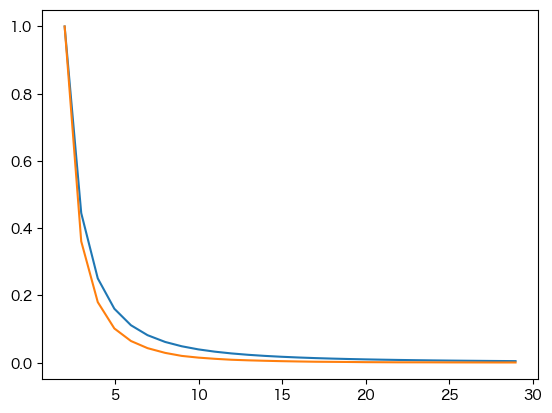

In [20]:
far = Farrell(distance_eq,
                 eff[0],
                 eff[1])

far_norm = far/far.max()
# far_norm = far
plt.plot(distance_eq,far_norm)

temp = 10**(apple_smooth_eq.iloc[:,30])
plt.plot(distance_eq,(temp/temp.max()))

from sklearn.metrics import r2_score
print(r2_score((10**apple_smooth_eq.iloc[:,0]/10**apple_smooth_eq.iloc[:,0].max()),
         (far/far.max())))

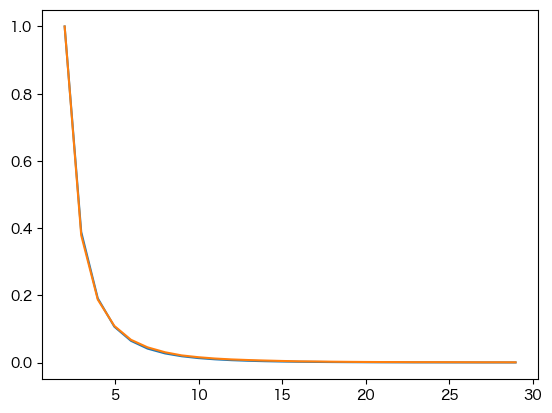

In [21]:
far = Farrell(distance_eq,
                 eff_df.iloc[0,:1].values,
                 eff_df.iloc[1,:1].values)

plt.plot(distance_eq,far/far.max())

temp = 10**apple_smooth_eq.iloc[:,0]
plt.plot(distance_eq,(temp/temp.max()))

0.9954957518353018